# Introduction

This notebook is a companion to the paper posted at <span style="color:red;">add URL</span>, which examines the effect of the finite size of neutron stars on the detectability of gravitational wave signals emitted by inspiralling sub solar-mass binary neutron star systems, using template bank searches. It provides the data files generated from the analysis, and demonstrates how to use these to generate the figures in the paper. 
The figures in this notebook serve to corroborate the results from the paper, illustrating the loss in sensitivity of the Advanced LIGO detectors to signals from these sources, on neglecting the tidal deformability and lower merger frequencies of neutron stars in the search templates.

<a id=’Data_Files’></a>
# Data Files

A brief description of the data files used to generate the figures is provided below: 

(1) `q1_isco_data.txt`: contains match values (column 3) between injected equal mass binary neutron star inspiral signals and binary black hole signals having the same component masses, as a function of chirp mass (column 1) and effective tidal deformability (column 2) of the binary neutron star system.  

(2) In the next three data files, each of which is a 7-column dataset with column headings as follows:
`chirp-mass`, `match`, `mass1`, `mass2`, `lambda1`, `lambda2`, `Schwarzschild ISCO frequency`,
we have listed the calculated values of match between injected equal mass binary neutron star signals and binary black hole signals having the same component masses, wherein the tidal deformabilities of the neutron stars are derived from the equations of state referenced below. The first 2 columns in each of these three files are used to generate the plot on the right hand panel of Figure 1.
   
   a. `mchirp_vs_match_APR_745320.0.txt`: $\Lambda_1$, $\Lambda_2$ used in the match computations are derived from the [APR](https://journals.aps.org/prc/abstract/10.1103/PhysRevC.58.1804) equation of state.

   b. `mchirp_vs_match_SLY4_745321.0.txt`: $\Lambda_1$, $\Lambda_2$ used in the match computations arevderived from the [SLy4](https://www.aanda.org/articles/aa/abs/2001/46/aa1755/aa1755.html) equation of state.

   c. `mchirp_vs_match_BSK21_745322.0.txt`: $\Lambda_1$, $\Lambda_2$ used in the match computations are derived from the [BSk21](https://www.aanda.org/articles/aa/full_html/2013/12/aa21697-13/aa21697-13.html) equation of state.
   
(3) The equation of state files tabulate `neutron star mass` ($m (M_{\odot}$)) and the corresponding `tidal deformability` ($\Lambda$) computed using modules from the publicly available library [LALSimulation](https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/index.html). 

   a. `APR-EOS.txt` : mass and tidal deformability values for the APR equation of state.
   
   b. `SLY-EOS.txt` : mass and tidal deformability values for the SLy4 equation of state.
   
   c. `BSK21-EOS.txt` : mass and tidal deformability values for the BSk21 equation of state.

(4) `M1010_APR_LP.txt`: contains values for orbital frequency, ADM mass and angular momentum of a simulated binary neutron star system with $m_1 = m_2 = 1 \, M_{\odot}$ at different stages of its inspiral phase, as computed with LORENE.

(5) The following three files tabulate the estimated values of the orbital frequencies of the binary neutron stars at the mass shedding limit for the binary neutron star inspiral signals, simulated using the publicly available library [LORENE](https://lorene.obspm.fr/), for the three different equations of state considered in this study.
   
   a. `APR_lorene_ISCO.txt`: simulations performed for the APR equation os state.

   b. `SLy4_lorene_ISCO.txt`: simulations performed for the SLy4 equation os state.

   c. `BSk21_lorene_ISCO.txt`: simulations performed for the APR equation os state.
   
(6) `banksims_BBH.txt`: contains the results of template bank simulations performed for injected binary black hole signals with component masses in the range $[0.2,1.0] \, M_{\odot}$, against a set of binary black hole templates generated to cover the same parameter space, i.e. $m_1,m_2 \in [0.2,1.0] \, M_{\odot}$. The column headings are as follows:

`injection-m1`,  `injection-m2`, `lambda1` (0), `lambda2` (0), `template_m1`, `template_m2`, `fitting_factor`,  `same_mass_match(injection,BBH)` (1),  `f_{Schwarzschild ISCO}`

where `injection-m1`,  `injection-m2` are the masses of the black holes used for the injected signals, `lambda1`, `lambda2` are their respective tidal deformabilities, which are by definiton 0 for black holes,  `template_m1`, `template_m2` are the masses from the template bank for which the calculated match value is the fitting factor, `same_mass_match(injection,BBH)` is the match between the injected binary black hole signal with the individual masses being `injection-m1`,  `injection-m2` and a binary black hole signal having the same component masses, which is by definition 1,  and `f_{Schwarzschild ISCO}` is the frequency of gravitational wave emission for a point particle orbitting around a Schwarzschild black hole of mass injection-m1+injection-m2, in its innermost stable circular orbit (ISCO). 

(7) The results of template bank simulations performed for injected binary neutron star signals with component masses in the range $[0.2,1.0] \, M_{\odot}$ and tidal deformabilities derived from the aforementioned equations of state, are summarized in the next three files. The column headings for each of these files are as follows: 

`injection-m1`,  `injection-m2`, `lambda1`, `lambda2`, `template_m1`, `template_m2`, `fitting_factor`,  `same_mass_match(BNS,BBH)`,  `$f_{Roche}$`

where `injection-m1`,  `injection-m2` are the masses of the component neutron stars for the injected signals, `lambda1`, `lambda2` are their respective tidal deformabilities, `template_m1`, `template_m2` are the masses from the template bank for which the calculated match value is the fitting factor, `same_mass_match(BNS,BBH)` is the match between the binary neutron star signal with the individual masses being `injection-m1`,  `injection-m2` and a binary black hole signal having the same component masses, and `f_{Roche}` is the Roche Lobe overflow frequency for the binary neutron star system, which is taken to be the termination point for the inspiral signal.
   
   a. `APR_bns_rlo_data.txt`: template bank simulation results for the APR equation of state.

   b. `SLY4_bns_rlo_data.txt`: template bank simulation results for the SLy4 equation of state.

   c. `BSK21_bns_rlo_data.txt`: template bank simulation results for the BSk21 equation of state.

(8) `nonecco3b.txt`: contains upper limits on the merger rate for non-eccentric compact binary sources, downloaded from the [github repository](https://github.com/gwastro/subsolar-O3-search/blob/master/upper_limits/noneccO3b.txt) for the public data release for the search for subsolar-mass binaries through LIGO and Virgo's third observing run, presented in the work by [Nitz & Wang](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.106.023024).  

The unit for masses of the compact objects tablulated in all the above data files is $M_{\odot}$, the tidal deformabilities are dimensionless, the unit for frequency is Hz, and all other quantities are dimensionless.












In [1]:
#Import modules 
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "STIX"
rcParams["mathtext.fontset"] = "stix"
rcParams['figure.figsize']=(35,10)
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 14
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['legend.fontsize']=12
from pycbc.conversions import f_schwarzchild_isco,lambda_tilde,mchirp_from_mass1_mass2
import numpy as np
from scipy.interpolate import interp1d
import math
from scipy import optimize

In [2]:
#Extract the files from the tarball into the folder 'data_files'
!tar -xzvf datafiles.tar.gz -C ./

data_files/
data_files/BSK21_bns_rlo_data.txt
data_files/APR-EOS.txt
data_files/BSk21_lorene_ISCO.txt
data_files/mchirp_vs_match_SLY4_745321.0.txt
data_files/SLY4_bns_rlo_data.txt
data_files/mchirp_vs_match_BSK21_745322.0.txt
data_files/banksims_bbh.txt
data_files/M1010_APR_LP.txt
data_files/SLy4_lorene_ISCO.txt
data_files/SLY-EOS.txt
data_files/APR_bns_rlo_data.txt
data_files/nonecco3b.txt
data_files/APR_lorene_ISCO.txt
data_files/BSK21-EOS.txt
data_files/q1_isco_data.txt
data_files/mchirp_vs_match_APR_745320.0.txt


## Figure 1 : Match Between BNS and BBH waveforms as a function of Mass and EoS


We use the  `q1_isco_data.txt` file, described in the [Data Files](#Data_Files) section to plot the match between injected binary neutron star (BNS) signals with chirp mass $\mathcal{M}_C$ and effective tidal deformability $\tilde{\Lambda}$ and binary black hole (BBH) signals having the same component masses, on the left panel.

Here, and in the context of all the subsequent figures, the following definitions have been used.

$\mathcal{M}_C$ : Chirp Mass of the compact binary system with component masses $m_1$ and $m_2$ is defined as

\begin{equation}
    \boxed{\mathcal{M}_C = \frac{(m_1 m_2)^{3/5}}{(m_1+m_2)^{1/5}} .}
    \label{chirpmass} \tag{1}
\end{equation}

$\tilde{\Lambda}$ : Effective tidal deformability of a binary neutron star system with component masses $m_1$ and $m_2$, and tidal deformabilities $\Lambda_1$ and $\Lambda_2$, is defined as

\begin{equation*}
     \boxed{\tilde{\Lambda} = \frac{16}{13} \frac{\left( m_1 + 12 m_2 \right) m_1^4 \Lambda_1 + \left( m_2 + 12 m_1 \right) m_2^4 \Lambda_2}{\left( m_1 + m_2\right)^5}.}
     \label{effective_td} \tag{2}
\end{equation*}

Match between two Fourier Domain waveforms $\tilde{u}$ and $\tilde{h}$ quantifies the similarity between the two waveforms, and is defined as

\begin{equation}
          \boxed{\mathbb{M} (\tilde{u}(\Lambda),\tilde{h}(\lambda;t_c,\phi_c)) = \underset{t_C,\phi_C}{\max} \langle \tilde{u}(\Lambda)|\tilde{h}(\lambda)e^{i (2 \pi f t_c-\phi_c)} \rangle.}
          \label{match} \tag{3}
\end{equation}

where $\langle \tilde{u}(\Lambda)|\tilde{h}(\lambda) \rangle$ is the noise weighted overlap between the two waveforms. The match is the overlap between the two waveforms maximized over the extrinsic parameters of the system, in this case the time and phase of coalescence. Match calculations between the waveforms are implemented using the `match()` function from the [pycbc.filter.matchedfilter](https://pycbc.org/pycbc/latest/html/pycbc.filter.html) module.

To make the plot on the right panel, we use the first three columns of each of the files `mchirp_vs_match_APR_745320.0.txt`, `mchirp_vs_match_SLY4_745321.0.txt`, `mchirp_vs_match_BSK21_745322.0.txt` to plot the match values between injected BNS and BBH signals for equal mass sources, for the three different equations of state.

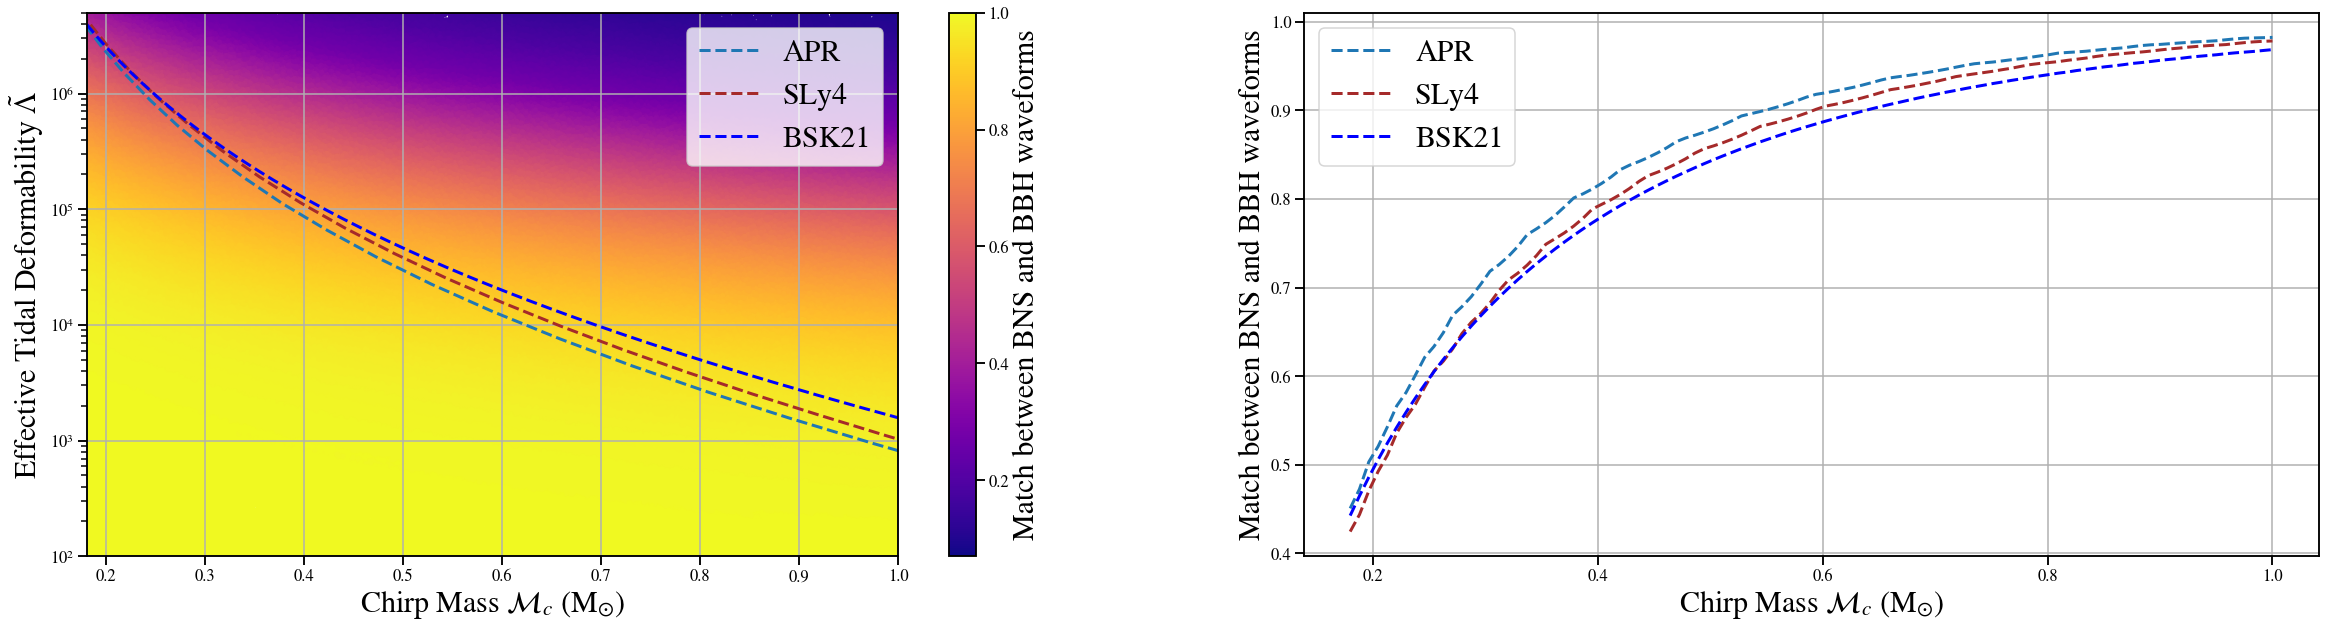

In [3]:
import seaborn as sns
sns.set_context('talk')
rcParams['figure.figsize']=(40,10)
mass,lmd,overlap = np.loadtxt('data_files/q1_isco_data.txt',unpack=True)
apr_mchirp,apr_match,_,_,_,_,_=np.loadtxt('data_files/mchirp_vs_match_APR_745320.0.txt',unpack=True)
sly_mchirp,sly_match,_,_,_,_,_=np.loadtxt('data_files/mchirp_vs_match_SLY4_745321.0.txt',unpack=True)
bsk21_mchirp,bsk21_match,_,_,_,_,_=np.loadtxt('data_files/mchirp_vs_match_BSK21_745322.0.txt',unpack=True)
m_apr,l_apr=np.loadtxt('data_files/APR-EOS.txt',unpack=True)
m_sly,l_sly=np.loadtxt('data_files/SLY-EOS.txt',unpack=True)
l_apr=lambda_tilde(m_apr,m_apr,l_apr,l_apr)
l_sly=lambda_tilde(m_sly,m_sly,l_sly,l_sly)
m_apr= mchirp_from_mass1_mass2(m_apr, m_apr)
m_sly=mchirp_from_mass1_mass2(m_sly, m_sly)

bsk_m,bsk_l = np.loadtxt('data_files/BSK21-EOS.txt',unpack=True)
bsk_mc=mchirp_from_mass1_mass2(bsk_m,bsk_m)
bsk_ltilde=lambda_tilde(bsk_m,bsk_m,bsk_l,bsk_l)
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.semilogy(m_apr,l_apr,label='APR',ls='--',linewidth=3)
ax1.semilogy(m_sly,l_sly,label='SLy4',ls='--',color='brown',linewidth=3)
ax1.semilogy(bsk_mc,bsk_ltilde,label='BSK21',ls='--',color='blue',linewidth=3)
ax1.set_xlim(0.18,1.0)
ax1.set_ylim(1e2,5e6)
ax1.grid()
ax1.set_xlabel(r'Chirp Mass $\mathcal{M}_c$ (M$_{\odot}$)',fontsize=30)
ax1.set_ylabel(r'Effective Tidal Deformability $\tilde{\Lambda}$',fontsize=30)
pcm=ax1.scatter(mass,lmd,c=overlap,s=15,cmap='plasma',vmin=0.07,vmax=1.0)
cbar=fig.colorbar(pcm,ax=ax1)
cbar.set_label('Match between BNS and BBH waveforms',fontsize=30)
ax1.legend(loc='upper right',fontsize=30)
ax2.plot(apr_mchirp,apr_match,ls='--',label='APR',linewidth=3)
ax2.plot(sly_mchirp,sly_match,ls='--',color='brown',label='SLy4',linewidth=3)
ax2.plot(bsk21_mchirp,bsk21_match,ls='--',color='blue',label='BSK21',linewidth=3)
ax2.set_xlabel(r'Chirp Mass $\mathcal{M}_c$ (M$_{\odot}$)',fontsize=30)
ax2.set_ylabel('Match between BNS and BBH waveforms',fontsize=30)
ax2.legend(loc='upper left',fontsize=30)
ax2.grid()

plt.show()
fig.savefig('./Plots/Figure1_overlap_mass_lambda.png')

$\textbf{FIG. 1}$ : Left panel shows the match between BNS and BBH waveforms as a function of chirp mass $\mathcal{M}_C$ and effective tidal deformability $\tilde{\Lambda}$ of the binary system, for equal mass binaries. The BNS signals are terminated at the ISCO frequency for a point particle orbiting a Schwarzschild black hole. Low match values in the region bounded by the EoS curves indicate that ignoring the tidal deformability of sub-solar mass neutron stars can reduce the sensitivity of LIGO searches to GW signals from these sources. Right panel shows the match between BNS and BBH waveforms as a function of the chirp mass of the system, for equal mass binaries, and for three different neutron star equations of state.

## Figure 2 : Gravitational Binding Energy Curve

To generate this figure, the orbital frequencies and the ADM masses of the binary neutron star system are read from the `M1010_APR_LP.txt` file and the gravitational binding energy from the simulations, as well as that predicted by the Post Newtonian approximation,  and frequency of the emitted gravitational wave signal during the inspiral phase are calculated in the code cell below.

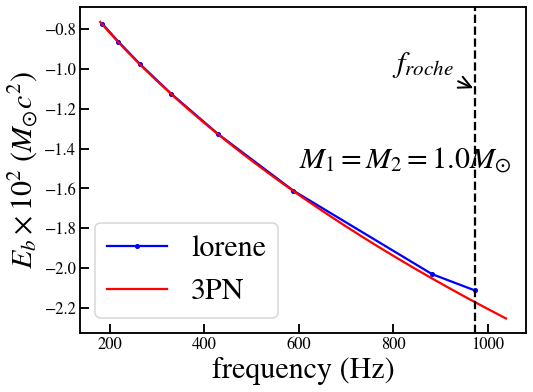

In [4]:
rcParams['figure.figsize']=(8,6)


f1,adm= np.loadtxt("data_files/M1010_APR_LP.txt", usecols =(0,1) , unpack = True )


kN1=4.06*10**(-4)
fgw=2*f1


f3=np.arange(180,1040,1)
m1=2.0
mo=1.989*10**30
G=6.67*10**(-11)
c=3*10**8
r=(2*math.pi*G*mo)/c**3

o2=r*m1*f3/2
pn3=(-1/8*(o2**(2/3))+37/384*(o2**(4/3))+1069/3072*(o2**(2))+(5/3072)*(41*math.pi**2-285473/864)*(o2**(8/3)))*m1

eb=2*adm-m1


fig, ax = plt.subplots()
ax.plot(fgw,eb*100,'b-o',markersize=4,label='lorene')
ax.plot(f3,pn3*100,'r',label='3PN')

ax.set_xlabel('frequency (Hz)', fontsize=30)
ax.set_ylabel(r'$E_{b} \times 10^{2}$ $(M_{\odot}c^{2})$', fontsize=30)
ax.tick_params(direction='in')

plt.axvline(x=fgw[-1], color='k', ls='--')

plt.text(600,-1.5,r'$M_1 = M_2 = 1.0 M_{\odot}$',fontsize=30)
plt.annotate(r'$f_{roche}$', xy=(fgw[-1], -1.1),  xycoords='data',
            xytext=(0.7, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle= '->', color='black', lw=2, ls='-'), fontsize=30)
plt.legend(loc='best',fontsize=30)
plt.show()
fig.savefig('./Plots/Figure2_E_b_vs_frequency.png')

$\textbf{FIG. 2}$ :Gravitational binding energy $E_{b}$ for an equal mass binary neutron star system with $M_1 = M_2 = 1\ M_\odot$ as computed with LORENE (accounting for matter effects) and in the point-particle limit at 3PN. The APR equation of state is used in this calculation. The Roche lobe overflow frequency (vertical dashed line) is estimated as the frequency beyond which no equilibrium solution can be found.

## Figure 3 : Roche Lobe Overflow Frequencies for 3 different Equations of State

The following code block reads the primary and secondary masses for several sub-solar mass binary neutron star systems, and their Roche Lobe overflow frequencies computed using the LORENE software, from the files `APR_lorene_ISCO.txt`, `SLy4_lorene_ISCO.txt` and `BSk21_lorene_ISCO.txt`,  and generates a plot that compares the Roche Lobe overflow frequencies for the three different equations of state. As can be seen in FIG. 3 below, the  the Roche Lobe overflow frequencies do not vary significantly for the different equations of state.  

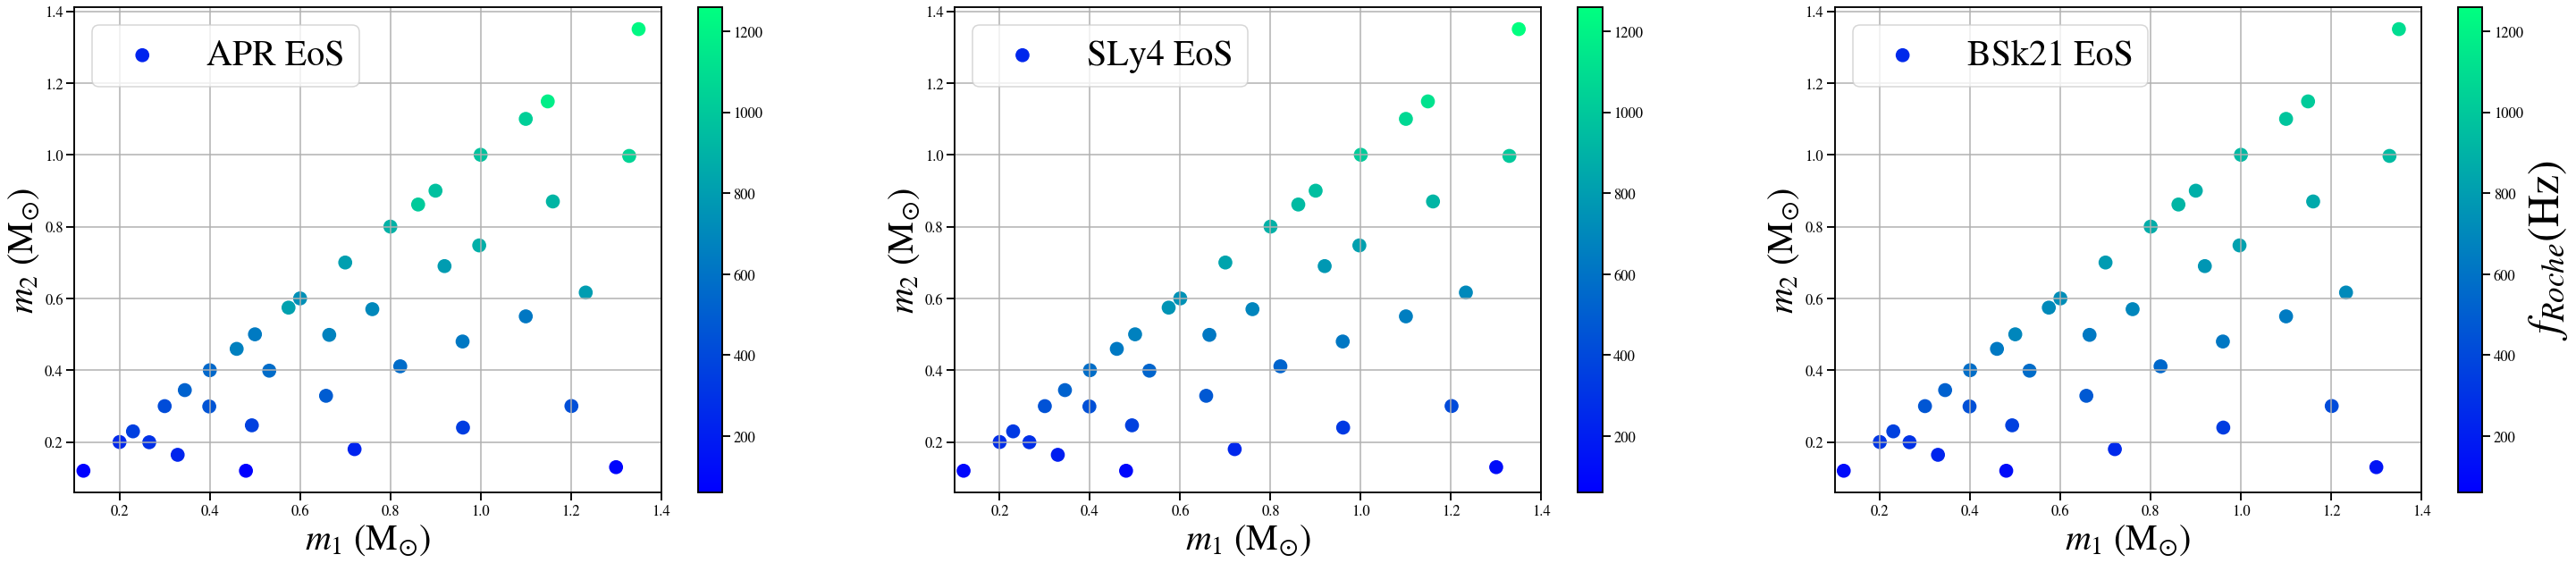

In [5]:
rcParams['figure.figsize']=(50,10)


#Reading Roche Lobe Overflow Frequencies
apr_m2,apr_m1,apr_f_orbital=np.loadtxt('data_files/APR_lorene_ISCO.txt',unpack=True)
sly_m2,sly_m1,sly_f_orbital=np.loadtxt('data_files/SLy4_lorene_ISCO.txt',unpack=True)
bsk_m2,bsk_m1,bsk_f_orbital=np.loadtxt('data_files/BSk21_lorene_ISCO.txt',unpack=True)
apr_f_orbital=2*apr_f_orbital
sly_f_orbital=2*sly_f_orbital
bsk_f_orbital=2*bsk_f_orbital

fig,(ax1,ax2,ax3)=plt.subplots(1,3)
pcm=ax1.scatter(apr_m1,apr_m2,c=apr_f_orbital,cmap='winter',s=200,vmin=60,vmax=1260,label='APR EoS')
ax1.set_xlabel(r'$m_1$ (M$_{\odot}$)',fontsize=40)
ax1.set_ylabel(r'$m_2$ (M$_{\odot}$)',fontsize=40)
ax1.legend(fontsize=40)
ax1.set_xlim(0.1,1.4)
cbar=fig.colorbar(pcm,ax=ax1)
ax1.grid()

pcm=ax2.scatter(sly_m1,sly_m2,c=sly_f_orbital,cmap='winter',s=200,vmin=60,vmax=1260,label='SLy4 EoS')
cbar=fig.colorbar(pcm,ax=ax2)
ax2.set_xlabel(r'$m_1$ (M$_{\odot}$)',fontsize=40)
ax2.set_ylabel(r'$m_2$ (M$_{\odot}$)',fontsize=40)
ax2.set_xlim(0.1,1.4)
ax2.legend(fontsize=40)
ax2.grid()
pcm=ax3.scatter(bsk_m1,bsk_m2,c=bsk_f_orbital,cmap='winter',s=200,vmin=60,vmax=1260,label='BSk21 EoS')
ax3.set_xlabel(r'$m_1$ (M$_{\odot}$)',fontsize=40)
ax3.set_ylabel(r'$m_2$ (M$_{\odot}$)',fontsize=40)
ax3.legend(fontsize=40)
ax3.set_xlim(0.1,1.4)
ax3.grid()
cbar=fig.colorbar(pcm,ax=ax3)
cbar.set_label('$f_{Roche}$(Hz)',fontsize=50)
plt.show()
fig.savefig('./Plots/Figure3_Roche_Lobe_Overflow_Frequencies.png')

$\textbf{FIG. 3}$ : Gravitational wave frequency at Roche lobe overflow for binaries with different masses $m_1 \geq m_2$ and three equations of state: APR, SLy4, and BSk21. Each point represents a binary and is colored according to the gravitational wave frequency at the point of Roche lobe overflow.

## Figure 4 : Checking Efficacy of Template Bank

The following code block reads the results (column headings as discussed in the [Data Files](#Data_Files) section)  of template bank simulations performed for a set of injected binary black hole signals with component masses in the range $m_1, m_2 \in [0.2,1.0] \, M_{\odot}$, from the `banksims_bbh.txt` file, and plots the fitting factors as a function of the primary mass (plotted along the x-axis) and secondary mass (plotted along the y-axis) of the injected signal.

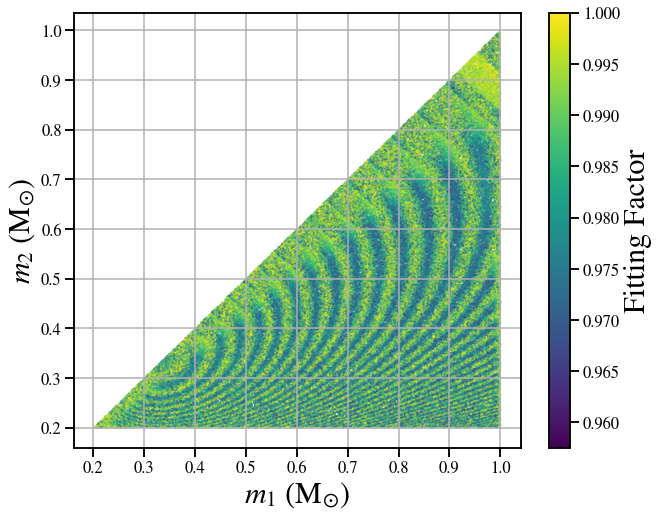

In [6]:
import seaborn as sns
sns.set_context('talk')
#Reading Template Bank Simulation Data
mass1, mass2,lmd1,lmd2,sim_mass1,sim_mass2,best_match,same_mass_match,f_isco = np.loadtxt('data_files/banksims_bbh.txt',unpack=True)

#Plotting Figure 4 from paper
rcParams['figure.figsize']=(10,8)
fig=plt.figure()
plt.scatter(mass1,mass2,c=best_match,s=0.1,cmap='viridis')
cbar=plt.colorbar()
cbar.set_label('Fitting Factor',fontsize=30)
plt.xlabel(r'$m_1$ (M$_{\odot}$)',fontsize=30)
plt.ylabel(r'$m_2$ (M$_{\odot}$)',fontsize=30)
plt.grid()
plt.show()
fig.savefig('Plots/Figure4_BBH_m1m2.png')

$\textbf{FIG. 4}$ : The shaded region in the figure shows the fitting factor as a function of component masses $(m_1,m_2)$ of injected BBH signals. Fitting factors are highest for signals located closest to the templates, and lowest for those located equidistant from two nearest templates.

## Figure 5 : Template Bank Simulation Plots for Injected BNS Signals

The following code block reads the results (column headings as discussed in the [Data Files](#Data_Files) section)  of template bank simulations performed for a set of injected binary neutron star signals with component masses in the range $m_1, m_2 \in [0.2,1.0] \, M_{\odot}$, and tidal deformabilities derived from the three different equations of state under consideration, from the `APR_bns_rlo_data.txt`, `SLY4_bns_rlo_data.txt`, and  `BSK21_bns_rlo_data.txt` files, and plots the fitting factors as a function of the primary mass (plotted along the x-axis) and secondary mass (plotted along the y-axis) of the injected signal on the left panel, and the effective tidal deformabilities (defined in Eqn. 2 ) of the system on the right panel.

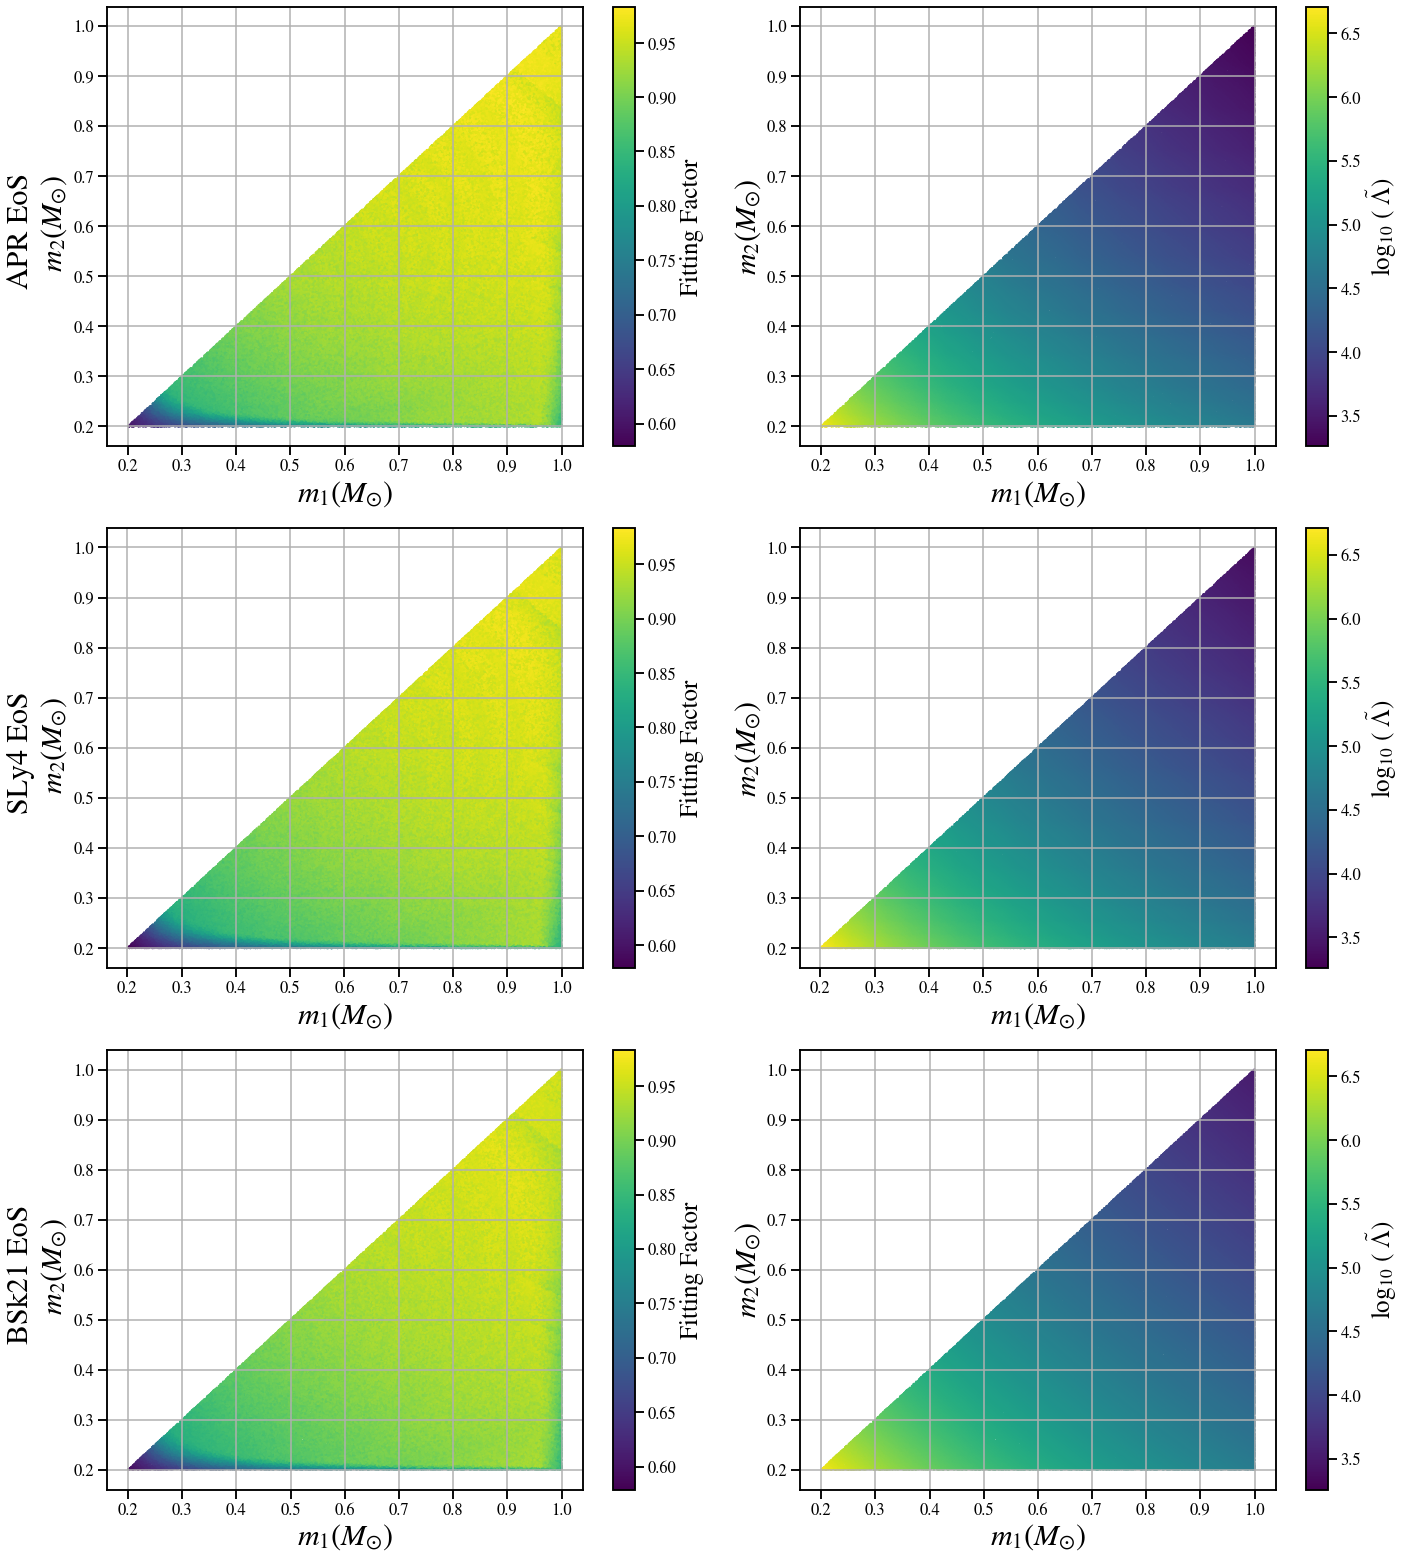

In [7]:
#Reading Template Bank Simulation Result Files
apr_mass1, apr_mass2,apr_lmd1, apr_lmd2, apr_sim_mass1,apr_sim_mass2,apr_best_match,apr_same_mass_match, apr_f_rlo = np.loadtxt('data_files/APR_bns_rlo_data.txt',unpack=True)
sly_mass1, sly_mass2,sly_lmd1, sly_lmd2, sly_sim_mass1,sly_sim_mass2,sly_best_match,sly_same_mass_match, sly_f_rlo = np.loadtxt('data_files/SLY4_bns_rlo_data.txt',unpack=True)
bsk21_mass1, bsk21_mass2,bsk21_lmd1, bsk21_lmd2, bsk21_sim_mass1,bsk21_sim_mass2,bsk21_best_match,bsk21_same_mass_match, bsk21_f_rlo = np.loadtxt('data_files/BSK21_bns_rlo_data.txt',unpack=True)

#Calculating Effective Tidal Deformabilities from component Tidal Deformabilities
apr_lmd_tilde=lambda_tilde(apr_mass1,apr_mass2,apr_lmd1,apr_lmd2)
sly_lmd_tilde=lambda_tilde(sly_mass1,sly_mass2,sly_lmd1,sly_lmd2)
bsk21_lmd_tilde=lambda_tilde(bsk21_mass1,bsk21_mass2,bsk21_lmd1,bsk21_lmd2)

#Plotting Figure 5 from paper
rcParams['figure.figsize']=(20,22)
fig,axs=plt.subplots(3,2)
pcm=axs[0,0].scatter(apr_mass1,apr_mass2,c=apr_best_match,s=1,cmap='viridis',vmin=0.579,vmax=0.983)
cbar=fig.colorbar(pcm,ax=axs[0,0])
cbar.set_label('Fitting Factor',fontsize=25)
axs[0,0].set_xlabel(r'$m_1(M_{\odot})$',fontsize=30)
axs[0,0].set_ylabel("APR EoS \n $m_2(M_{\odot})$",fontsize=30)
pcm=axs[1,0].scatter(sly_mass1,sly_mass2,c=sly_best_match,s=1,cmap='viridis',vmin=0.579,vmax=0.983)
cbar=fig.colorbar(pcm,ax=axs[1,0])
cbar.set_label('Fitting Factor',fontsize=25)
axs[1,0].set_xlabel(r'$m_1(M_{\odot})$',fontsize=30)
axs[1,0].set_ylabel("SLy4 EoS \n $m_2(M_{\odot})$",fontsize=30)
pcm=axs[2,0].scatter(bsk21_mass1,bsk21_mass2,c=bsk21_best_match,s=1,cmap='viridis',vmin=0.579,vmax=0.983)
cbar=fig.colorbar(pcm,ax=axs[2,0])
cbar.set_label('Fitting Factor')
axs[2,0].set_xlabel(r'$m_1(M_{\odot})$',fontsize=30)
axs[2,0].set_ylabel("BSk21 EoS \n $m_2(M_{\odot})$",fontsize=30)
cbar.set_label('Fitting Factor',fontsize=25)
pcm=axs[0,1].scatter(apr_mass1,apr_mass2,c=np.log10(apr_lmd_tilde),s=1,cmap='viridis',vmin=3.26,vmax=6.71)
cbar=fig.colorbar(pcm,ax=axs[0,1])
cbar.set_label(r'$\log_{10}$ ( $\tilde{\Lambda} )$',fontsize=25)
axs[0,1].set_xlabel(r'$m_1(M_{\odot})$',fontsize=30)
axs[0,1].set_ylabel(r'$m_2(M_{\odot})$',fontsize=30)
pcm=axs[1,1].scatter(sly_mass1,sly_mass2,c=np.log10(sly_lmd_tilde),s=1,cmap='viridis',vmin=3.26,vmax=6.71)
cbar=fig.colorbar(pcm,ax=axs[1,1])
cbar.set_label(r'$\log_{10}$ ( $\tilde{\Lambda} )$',fontsize=25)
axs[1,1].set_xlabel(r'$m_1(M_{\odot})$',fontsize=30)
axs[1,1].set_ylabel(r'$m_2(M_{\odot})$',fontsize=30)
pcm=axs[2,1].scatter(bsk21_mass1,bsk21_mass2,c=np.log10(bsk21_lmd_tilde),s=1,cmap='viridis',vmin=3.26,vmax=6.71)
cbar=fig.colorbar(pcm,ax=axs[2,1])
cbar.set_label(r'$\log_{10}$ ( $\tilde{\Lambda} )$',fontsize=25)
axs[2,1].set_xlabel(r'$m_1(M_{\odot})$',fontsize=30)
axs[2,1].set_ylabel(r'$m_2(M_{\odot})$',fontsize=30)
for i in range(0,3):
    for j in range(0,2):
        axs[i,j].grid()
plt.tight_layout()        
plt.show()
fig.savefig('Plots/Figure5_templateBankSimulations.png')

$\textbf{FIG. 5}$ : Left panel shows fitting factors obtained on performing template bank simulations, for injected BNS signals with the component neutron stars having tidal deformabilities derived from the APR, SLy4 and BSk21 equations of state, and terminated at their Roche Lobe overflow frequencies, plotted as a function of the primary mass $m_1$ and secondary mass $m_2$. Right pannel shows a plot of effective tidal deformability of the BNS systems, as a function of $m_1$ and $m_2$. 

## Figure 6 : Upper Limit on Merger Rate of Sub-Solar Mass Binary Neutron Stars

Here we read the upper limits on the merger rate of sub-solar mass binaries from the `nonecco3b.txt` file and use them to derive an upper limit on the rate of sub-solar mass binary neutron star mergers by calculating the loss in sensitive volume of the detectors for BNS signals using the fitting factors for the BSK21 equation of state. The rate constraint on binary neutron stars was found to be very weakly dependent on the equation of state, and hence we have depicted the upper limit on rate for just one of them.



Upper Limit on the rate of sub-solar mass BBH mergers lies in the range 830.91-27373.52  Gpc^-3 yr^-1 
Upper Limit on the rate of sub-solar mass BNS mergers lies in the range 966.83-58416.91  Gpc^-3 yr^-1 


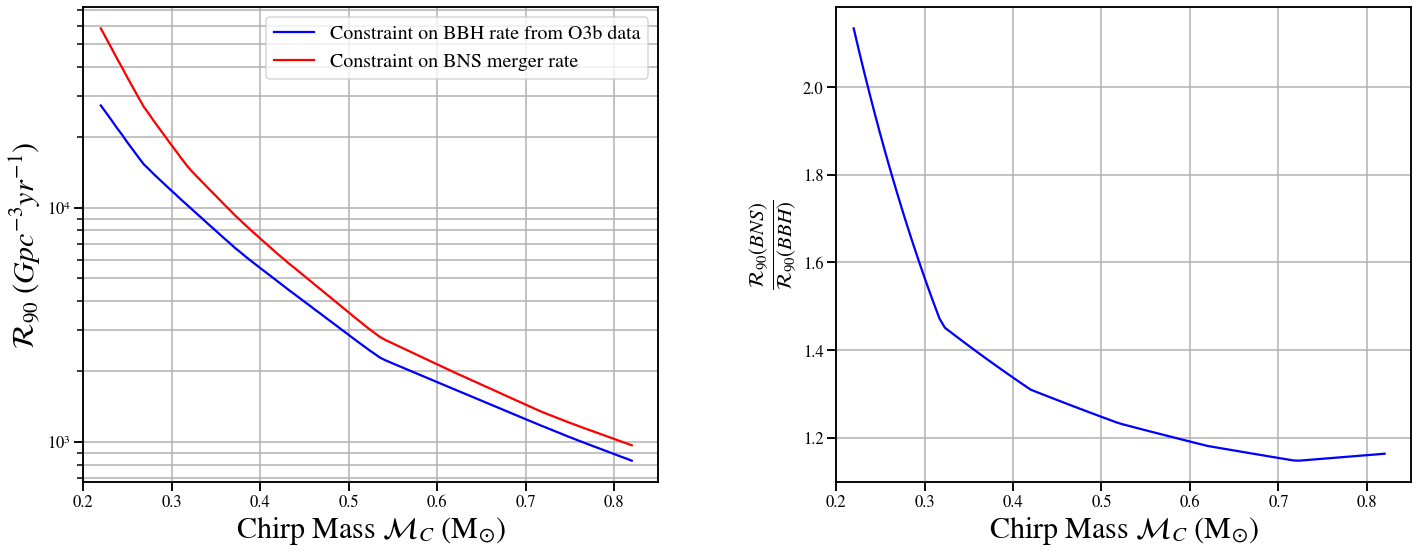

In [8]:
#Read template bank simulation results for the BSk21 Equation of State
mass1, mass2,lmd1, lmd2, sim_mass1,sim_mass2,fitting_factor,same_mass_match, f_rlo = np.loadtxt('data_files/BSK21_bns_rlo_data.txt',unpack=True)

#Read rate constraint data for the O3b observing run
chirpmass1,o3b_rate=np.loadtxt('data_files/nonecco3b.txt',unpack=True)

#Constructing Chirp Mass Bins
chirp_mass_2to3=[]
chirp_mass_3to4=[]
chirp_mass_4to5=[]
chirp_mass_5to6=[]
chirp_mass_6to7=[]
chirp_mass_7to8=[]
chirp_mass_8to9=[]
chirp_mass_9to10=[]

match_2to3=[]
match_3to4=[]
match_4to5=[]
match_5to6=[]
match_6to7=[]
match_7to8=[]
match_8to9=[]
match_9to10=[]

mchirp=mchirp_from_mass1_mass2(mass1,mass2)
for i in range(0,len(mchirp)):
    if(mchirp[i]>0.17 and mchirp[i]<0.27):
        chirp_mass_2to3.append(mchirp[i])
        match_2to3.append(fitting_factor[i])    
    elif(mchirp[i]>0.27 and mchirp[i]<0.37):
        chirp_mass_3to4.append(mchirp[i])
        match_3to4.append(fitting_factor[i])
    elif(mchirp[i]>0.37 and mchirp[i]<0.47):
        chirp_mass_4to5.append(mchirp[i])
        match_4to5.append(fitting_factor[i])
    elif(mchirp[i]>0.47 and mchirp[i]<0.57):
        chirp_mass_5to6.append(mchirp[i])
        match_5to6.append(fitting_factor[i])
    elif(mchirp[i]>0.57 and mchirp[i]<0.67):
        chirp_mass_6to7.append(mchirp[i])
        match_6to7.append(fitting_factor[i])
    elif(mchirp[i]>0.67 and mchirp[i]<0.77):
        chirp_mass_7to8.append(mchirp[i])
        match_7to8.append(fitting_factor[i])
    elif(mchirp[i]>0.77 and mchirp[i]<0.87):
        chirp_mass_8to9.append(mchirp[i])
        match_8to9.append(fitting_factor[i])
        
#Average over mass ratio
average_2to3=np.average(match_2to3)
average_3to4=np.average(match_3to4)
average_4to5=np.average(match_4to5)
average_5to6=np.average(match_5to6)
average_6to7=np.average(match_6to7)
average_7to8=np.average(match_7to8)
average_8to9=np.average(match_8to9)
chirpmass=[0.22,0.32,0.42,0.52,0.62,0.72,0.82]
average=[average_2to3,average_3to4,average_4to5,average_5to6,average_6to7,average_7to8,average_8to9]

#Creating 1d Interpolating Functions for the rate Constraints
match_function=interp1d(chirpmass,average,kind='linear')
m_chirp=np.linspace(0.22,0.82,100)
rate_function=interp1d(chirpmass1,o3b_rate,kind='linear')
bbh_rate=rate_function(m_chirp)
avg_ff=match_function(m_chirp)

#Calculating the Rate Constraint for BNS mergers
bns_rate=[]

for i in range(0,len(bbh_rate)):
    bns_rate.append(bbh_rate[i]/(avg_ff[i])**3)

#Calculating the ratio of rates of BNS to BBH mergers    
bns_over_bbh=[]
for i in range(0,len(bbh_rate)):
    bns_over_bbh.append(bns_rate[i]/bbh_rate[i])
    
print("Upper Limit on the rate of sub-solar mass BBH mergers lies in the range {}-{}  Gpc^-3 yr^-1 ".format(str(float('%.2f' %bbh_rate[len(bbh_rate)-1])),str(float('%.2f' %bbh_rate[0])))) 
print("Upper Limit on the rate of sub-solar mass BNS mergers lies in the range {}-{}  Gpc^-3 yr^-1 ".format(str(float('%.2f' %bns_rate[len(bns_rate)-1])),str(float('%.2f' %bns_rate[0]))))    


#Plotting Figure 6 from the paper    
rcParams['figure.figsize']=(22,10)
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(m_chirp,bbh_rate,label="Constraint on BBH rate from O3b data",color='blue')      
ax1.plot(m_chirp,bns_rate,label="Constraint on BNS merger rate",color='red')
ax1.set_yscale('log')   
ax1.set_xlabel(r'Chirp Mass $\mathcal{M}_C$ (M$_{\odot}$)',fontsize=30)
ax1.set_ylabel(r'$\mathcal{R}_{90}$ $(Gpc^{-3} yr^{-1})$',fontsize=30)
ax1.set_xlim(0.2,0.85)
ax1.legend(fontsize=20,loc='upper right')
ax1.grid(True, which="both")

ax2.plot(m_chirp,bns_over_bbh,color='blue')       
ax2.set_xlabel(r'Chirp Mass $\mathcal{M}_C$ (M$_{\odot}$)',fontsize=30)
ax2.set_ylabel(r'$\frac{\mathcal{R}_{90} (BNS)}{\mathcal{R}_{90} (BBH)}$',fontsize=30)
ax2.set_xlim(0.2,0.85)
ax2.grid()
fig.tight_layout(pad=5.0)
plt.show()
fig.savefig("Plots/Figure6_Rate_and_Ratio.png")



$\textbf{FIG. 6}$ : Left panel: Blue curve shows the upper limit on merger rate for sub-solar mass binaries reported in [Nitz & Wang](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.106.023024) for the O3b observing run. Red curve shows an upper limit on the rate of sub-solar mass binary neutron star mergers, obtained using the sensitive volume reduced by a factor of $(\textrm{average fitting factor})^3$. Right panel: The ratio of upper limit on the rate of binary neutron star mergers to the upper limit on the rate of binary black hole mergers, plotted as a function of chirp mass of the binary system.